# CIFAR-10

In [128]:
# Libraries
import tensorflow as tf
from keras.datasets import cifar10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import numpy as np

# Tensorflow aliases
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.utils import plot_model

In [129]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [130]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


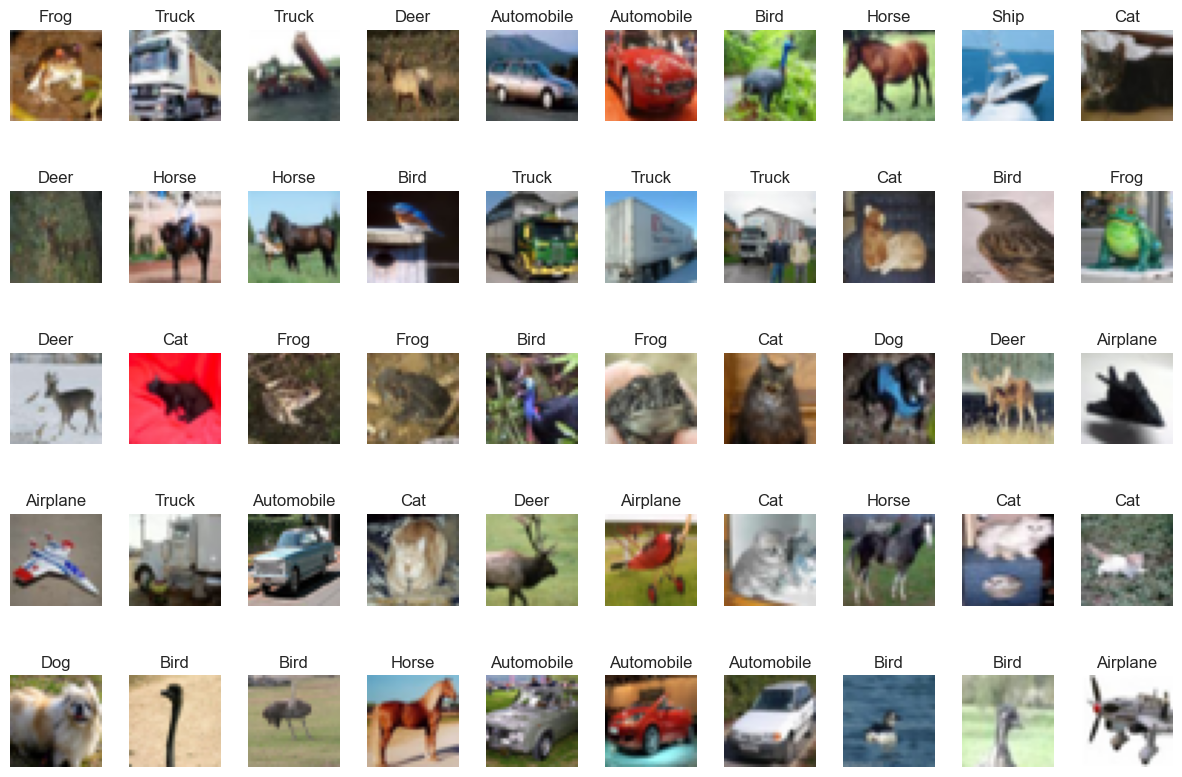

In [131]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(15,10))
sns.set_style('white')
for i in range(50):  
  plt.subplot(5, 10, i+1)
  plt.imshow(X_train[i].reshape((32, 32, 3)),cmap=plt.cm.hsv)
  plt.title(labels[y_train.reshape(1,len(y_train))[0][i]])
  plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## Data preprocessing

In [132]:
# Convert to float32 for scaling
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize data by scaling by max
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encode target labels and reshape
y_train = np_utils.to_categorical(y_train.transpose()).reshape(50000,10)
y_test = np_utils.to_categorical(y_test.transpose()).reshape(10000,10)
input_shape = (32,32,3)

print(f"Training set: {len(X_train)}\nTesting set: {len(X_test)}")

Training set: 50000
Testing set: 10000


## Building the models

In [133]:
# def build_cnn(activation='relu', kernel_size=(3,3), pool_size=(2,2), backwards=False, regularizer=None, lam=0.01, summarize=False, dropout=False, drop_prob=0.2):
#   model = Sequential()
  
#   if regularizer == None:
#     # Convolutional layers
#     model.add(Conv2D(filters=32, kernel_size=kernel_size, activation=activation, input_shape=(32, 32, 3)))
#     model.add(MaxPool2D(pool_size))

#     model.add(Conv2D(filters=64, kernel_size=kernel_size, activation=activation))
#     model.add(MaxPool2D(pool_size))

#     model.add(Conv2D(filters=128, kernel_size=kernel_size, activation=activation))
#     model.add(MaxPool2D(pool_size))
#     if dropout:
#       model.add(Dropout(drop_prob))

#     if backwards:
#       model.add(Conv2D(filters=64, kernel_size=kernel_size, activation=activation))
#       model.add(MaxPool2D(pool_size))
#       model.add(Conv2D(filters=32, kernel_size=kernel_size, activation=activation))
#       model.add(MaxPool2D(pool_size))
#       if dropout:
#         model.add(Dropout(drop_prob))
#       # Fully connected layers
#       model.add(Flatten())
#       model.add(Dense(32, activation=activation))
#       if dropout:
#         model.add(Dropout(drop_prob))
#     else:
#       # Fully connected layers
#       model.add(Flatten())
#       model.add(Dense(128, activation=activation))
#       if dropout:
#         model.add(Dropout(drop_prob))

#     # Output layer
#     model.add(Dense(10, activation='softmax'))

#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
#     if summarize:
#       model.build()
#       model.summary()
#     return model
#   else:
#     # Convolutional layers
#     model.add(Conv2D(filters=32, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation, input_shape=(32, 32, 3)))
#     model.add(MaxPool2D(pool_size))

#     model.add(Conv2D(filters=64, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation))
#     model.add(MaxPool2D(pool_size))

#     model.add(Conv2D(filters=128, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation))
#     model.add(MaxPool2D(pool_size))
#     if dropout:
#       model.add(Dropout(drop_prob))

#     if backwards:
#       model.add(Conv2D(filters=64, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation))
#       model.add(MaxPool2D(pool_size))
#       model.add(Conv2D(filters=32, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation))
#       model.add(MaxPool2D(pool_size))
#       if dropout:
#         model.add(Dropout(drop_prob))

#       # Fully connected layers
#       model.add(Flatten())
#       model.add(Dense(32, activation=activation, kernel_regularizer=regularizer(lam)))
#       if dropout:
#        model.add(Dropout(drop_prob))
#     else:
#       # Fully connected layers
#       model.add(Flatten())
#       model.add(Dense(128, activation=activation, kernel_regularizer=regularizer(lam)))
#       if dropout:
#         model.add(Dropout(drop_prob))

#     # Output layer
#     model.add(Dense(10, activation='softmax'))

#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#     if summarize:
#       model.build()
#       model.summary()
#     return model


In [134]:
def build_cnn(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, summarize=False, dropout=False, drop_prob=0.2):
  model = Sequential()
  
  if regularizer == None:
    # Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=kernel_size, activation=activation, input_shape=(32, 32, 3)))
    model.add(MaxPool2D(pool_size))

    model.add(Conv2D(filters=64, kernel_size=kernel_size, activation=activation))
    model.add(MaxPool2D(pool_size))

    model.add(Conv2D(filters=128, kernel_size=kernel_size, activation=activation))
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(Dropout(drop_prob))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    if dropout:
      model.add(Dropout(drop_prob))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    if summarize:
      model.build()
      model.summary()
    return model
  else:
    # Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation, input_shape=(32, 32, 3)))
    model.add(MaxPool2D(pool_size))

    model.add(Conv2D(filters=64, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation))
    model.add(MaxPool2D(pool_size))

    model.add(Conv2D(filters=128, kernel_size=kernel_size, kernel_regularizer=regularizer(lam), activation=activation))
    model.add(MaxPool2D(pool_size))
    if dropout:
      model.add(Dropout(drop_prob))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation=activation, kernel_regularizer=regularizer(lam)))
    if dropout:
      model.add(Dropout(drop_prob))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    if summarize:
      model.build()
      model.summary()
    return model


In [135]:
# Helper functions
def show_acc(h, e):
  plt.plot(range(e), h.history['accuracy'], label='Training')
  plt.plot(range(e), h.history['val_accuracy'], label='Validation')
  plt.ylim([0, 1])
  plt.legend()
  plt.show()

def build_and_plot(activation='relu', kernel_size=(3,3), pool_size=(2,2), regularizer=None, lam=0.01, dropout=False, drop_prob=0.2, summarize=False, e=100, verbose=0):
  model = build_cnn(activation=activation, kernel_size=kernel_size, pool_size=pool_size, regularizer=regularizer, lam=lam, dropout=dropout, drop_prob=drop_prob, summarize=summarize)
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=e, verbose=verbose)
  show_acc(history, e)
  print("Max accuracy: ", np.max(history.history['accuracy']))
  print("Min accuracy: ", np.min(history.history['accuracy']))
  print("Test performance ", model.evaluate(X_test, y_test))
  return model, history

# Test Models

## No backwards

### Without regularization

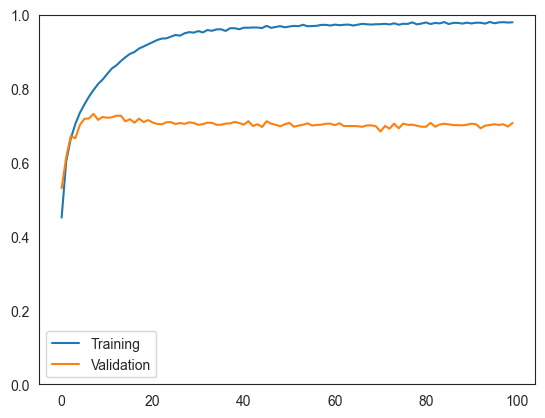

Max accuracy:  0.9803799986839294
Min accuracy:  0.4510999917984009
313/313 [==============================] - 1s 3ms/step - loss: 3.5296 - accuracy: 0.7070
Test performance  [3.529637575149536, 0.7070000171661377]


In [136]:
no_reg, no_reg_history = build_and_plot(e=100)

### L1 regularization

Models 2-5

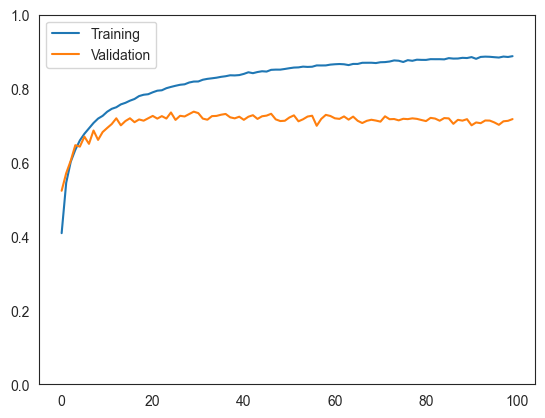

Max accuracy:  0.8877400159835815
Min accuracy:  0.40884000062942505
313/313 [==============================] - 1s 2ms/step - loss: 1.5069 - accuracy: 0.7175
Test performance  [1.5069485902786255, 0.7174999713897705]


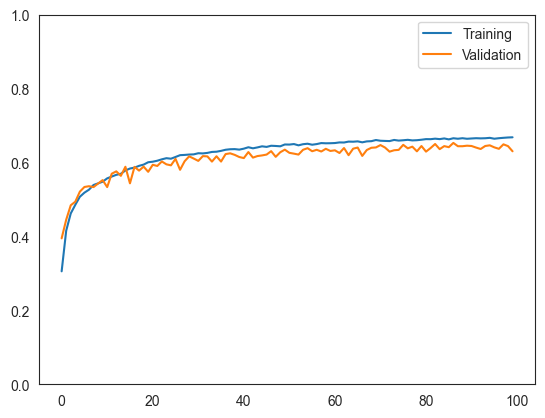

Max accuracy:  0.6682599782943726
Min accuracy:  0.305620014667511
313/313 [==============================] - 1s 3ms/step - loss: 1.2639 - accuracy: 0.6304
Test performance  [1.2638787031173706, 0.6304000020027161]


In [137]:
#l1_reg_00001, l1_reg_00001_history = build_and_plot(regularizer=l1, lam=0.00001, e=100)
l1_reg_0001, l1_reg_0001_history = build_and_plot(regularizer=l1, lam=0.0001, e=100)
l1_reg_0005, l1_reg_0005_history = build_and_plot(regularizer=l1, lam=0.0005, e=100)

### L2 regularization
Models 6-9

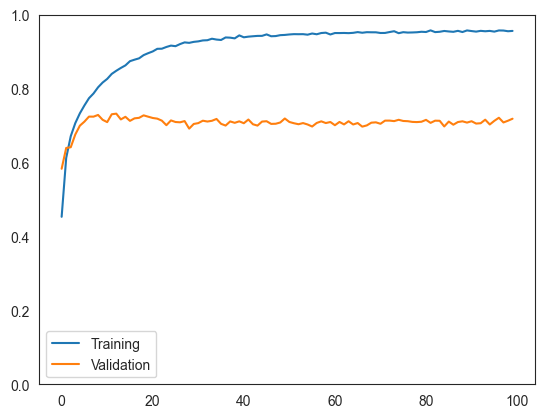

Max accuracy:  0.957539975643158
Min accuracy:  0.45311999320983887
313/313 [==============================] - 1s 3ms/step - loss: 1.8261 - accuracy: 0.7185
Test performance  [1.826101541519165, 0.718500018119812]


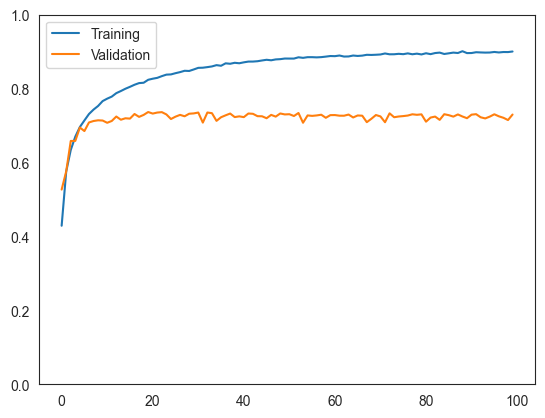

Max accuracy:  0.9011200070381165
Min accuracy:  0.4289399981498718
313/313 [==============================] - 1s 3ms/step - loss: 1.3495 - accuracy: 0.7298
Test performance  [1.3494713306427002, 0.7297999858856201]


In [138]:
#l2_reg_00001, l2_reg_00001_history = build_and_plot(regularizer=l2, lam=0.00001, e=100)
l2_reg_0001, l2_reg_0001_history = build_and_plot(regularizer=l2, lam=0.0001, e=100)
l2_reg_0005, l2_reg_0005_history = build_and_plot(regularizer=l2, lam=0.0005, e=100)

### Just dropout
Models 10-14

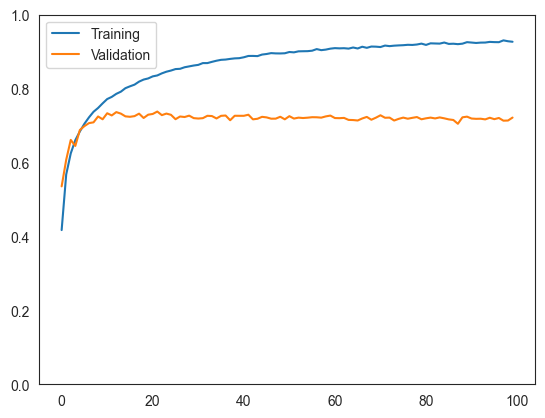

Max accuracy:  0.9304999709129333
Min accuracy:  0.4171999990940094
313/313 [==============================] - 1s 3ms/step - loss: 1.3458 - accuracy: 0.7216
Test performance  [1.3458014726638794, 0.7215999960899353]


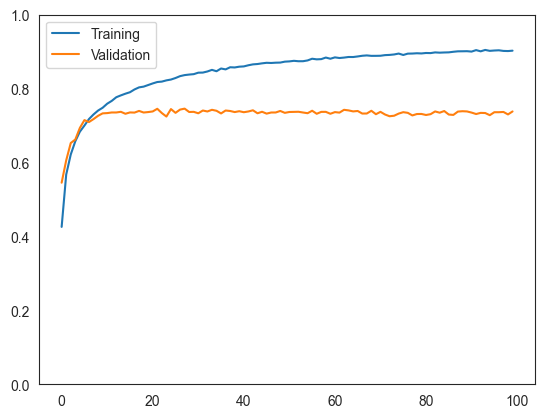

Max accuracy:  0.9046199917793274
Min accuracy:  0.425819993019104
313/313 [==============================] - 1s 3ms/step - loss: 1.0539 - accuracy: 0.7382
Test performance  [1.0539499521255493, 0.7382000088691711]


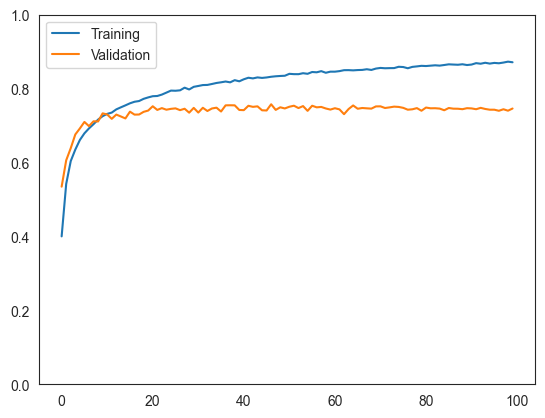

Max accuracy:  0.8729000091552734
Min accuracy:  0.40018001198768616
313/313 [==============================] - 1s 3ms/step - loss: 0.8849 - accuracy: 0.7461
Test performance  [0.8848670125007629, 0.7461000084877014]


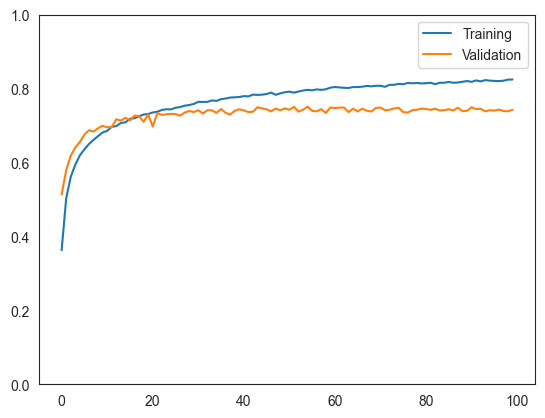

Max accuracy:  0.8246399760246277
Min accuracy:  0.36305999755859375
313/313 [==============================] - 1s 4ms/step - loss: 0.8074 - accuracy: 0.7426
Test performance  [0.8073946833610535, 0.7426000237464905]


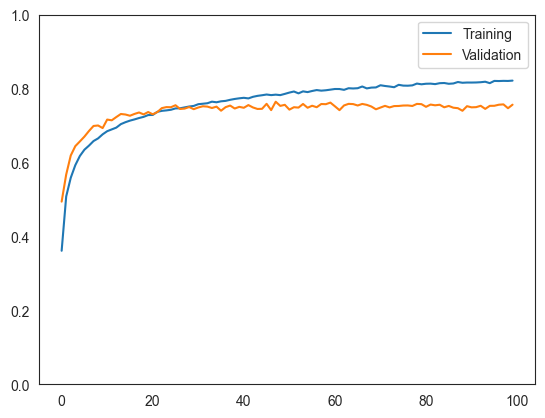

Max accuracy:  0.8215799927711487
Min accuracy:  0.36122000217437744
313/313 [==============================] - 1s 4ms/step - loss: 0.7685 - accuracy: 0.7565
Test performance  [0.7684904336929321, 0.7565000057220459]


In [139]:
drop_1, drop_1_history = build_and_plot(dropout=True, drop_prob=0.1, e=100)
drop_2, drop_2_history = build_and_plot(dropout=True, drop_prob=0.2, e=100)
drop_3, drop_3_history = build_and_plot(dropout=True, drop_prob=0.3, e=100)
drop_4, drop_4_history = build_and_plot(dropout=True, drop_prob=0.4, e=100)
drop_5, drop_5_history = build_and_plot(dropout=True, drop_prob=0.5, e=100)